# Test Score Prediction - PISA 2009

Shinto Theruvil Manuel

December 2016

## I. Definition
(1-2 pages)
### Project Overview

## II. Analysis 
(2-4 pages)
### Data Exploration

The datasets **pisa2009train.csv** and **pisa2009test.csv** contain information about the demographics
and schools for American students taking the exam, derived from 2009 PISA Public-Use Data Files
distributed by the United States National Center for Education Statistics (NCES). While the datasets
are not supposed to contain identifying information about students taking the test, by using the
data you are bound by the NCES data use agreement, which prohibits any attempt to determine
the identity of any student in the datasets.


#### Fields
The datasets have the following variables:
* **grade**: The grade in school of the student (most 15-year-olds in America are in 10th grade)
* **male**: Whether the student is male (1/0)
* **raceeth**: The race/ethnicity composite of the student
* **preschool**: Whether the student attended preschool (1/0)
* **expectBachelors**: Whether the student expects to obtain a bachelor's degree (1/0)
* **motherHS**: Whether the student's mother completed high school (1/0)
* **motherBachelors**: Whether the student's mother obtained a bachelor's degree (1/0)
* **motherWork**: Whether the student's mother has part-time or full-time work (1/0)
* **fatherHS**: Whether the student's father completed high school (1/0)
* **fatherBachelors**: Whether the student's father obtained a bachelor's degree (1/0)
* **fatherWork**: Whether the student's father has part-time or full-time work (1/0)
* **selfBornUS**: Whether the student was born in the United States of America (1/0)
* **motherBornUS**: Whether the student's mother was born in the United States of America (1/0)
* **fatherBornUS**: Whether the student's father was born in the United States of America (1/0)
* **englishAtHome**: Whether the student speaks English at home (1/0)
* **computerForSchoolwork**: Whether the student has access to a computer for schoolwork (1/0)
* **read30MinsADay**: Whether the student reads for pleasure for 30 minutes/day (1/0)
* **minutesPerWeekEnglish**: The number of minutes per week the student spend in English class
* **studentsInEnglish**: The number of students in this student's English class at school
* **schoolHasLibrary**: Whether this student's school has a library (1/0)
* **publicSchool**: Whether this student attends a public school (1/0)
* **urban**: Whether this student's school is in an urban area (1/0)
* **schoolSize**: The number of students in this student's school
* **readingScore**: The student's reading score, on a 1000-point scale (This is the **target** variable)

Lets examine the predictor variables:

** Categorical fields with order**
* grade 

**Categorical fields without order**
* raceeth

**Conitnueous variables**
* studentsInEnglish
* minutesPerWeekEnglish
* schoolSize

**Binary varibles**
* male
* preschool
* expectBachelors
* motherHS
* motherWork
* fatherHS
* fatherBachelors
* fatherWork
* selfBornUS
* englishAtHome
* computerForSchoolwork
* read30MinsADay
* schoolHasLibrary
* publicSchool
* urban

In [640]:
# import all required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [641]:
# Cross validation framework
def do_cross_validation(X, y, scoring = 'neg_mean_squared_error'):
    models = []
    models.append(('LR', LinearRegression()))
    models.append(('LASSO', Lasso()))
    models.append(('EN', ElasticNet()))
    models.append(('KNN', KNeighborsRegressor()))
    models.append(('CART', DecisionTreeRegressor()))
    models.append(('SVR', SVR()))
    results = []
    results_r2 = []
    names = []
    for name, model in models:
        kfold = KFold(n_splits=10, random_state=7)
        cv_results = np.sqrt(-cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring))
        cv_results_r2 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f) r2: %f (%f)" % \
        (name, cv_results.mean(), cv_results.std(), cv_results_r2.mean(), cv_results_r2.std())
        print(msg)
    return results, names


#### Dataset Size


In [642]:
pisaTrain = pd.read_csv('pisa2009train.csv')
pisaTest = pd.read_csv('pisa2009test.csv')
print('Shape of training set: ',pisaTrain.shape)
print('Shape of test set: ', pisaTest.shape)

('Shape of training set: ', (3663, 24))
('Shape of test set: ', (1570, 24))


#### Preview of dataset

In [643]:
#allData = pd.concat([pisaTrain, pisaTest],  ignore_index=True)
#print(allData.shape)
#allData.head()
pisaTrain.head()

,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,...,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
0,11,1,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,...,0.0,1.0,0.0,225.0,NaN,1.0,1,1,673.0,476.00
1,11,1,White,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,450.0,25.0,1.0,1,0,1173.0,575.01
2,9,1,White,1.0,1.0,1.0,1.0,1.0,1.0,NaN,...,1.0,1.0,0.0,250.0,28.0,1.0,1,0,1233.0,554.81
3,10,0,Black,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,200.0,23.0,1.0,1,1,2640.0,458.11
4,10,1,Hispanic,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,250.0,35.0,1.0,1,1,1095.0,613.89


### Missing values
It look like  there are some missing values. The missing values are shown in the above table as NaN. We will deal with missing values in preprocessing stage.

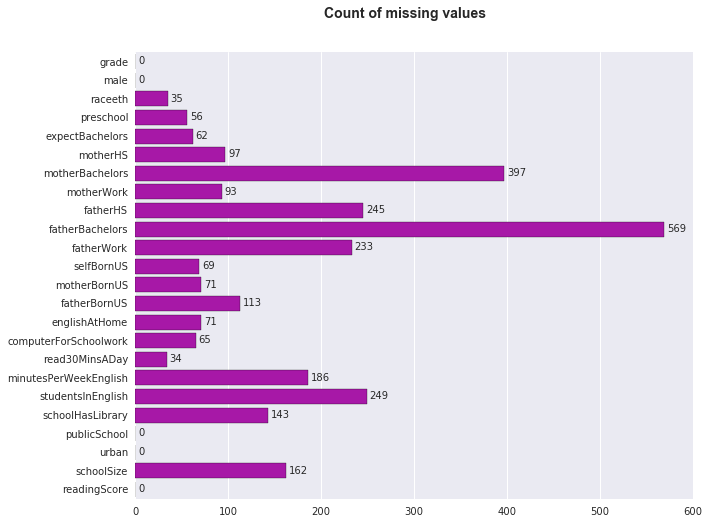

In [729]:
fig = plt.figure(figsize=(10, 8))
fig.suptitle('Count of missing values', fontsize=14, fontweight='bold')
null_data = pisaTrain.isnull().sum()
ax = sns.barplot(x = null_data.values, y=null_data.index, color="m" )
i = 0
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 3, p.get_y() + 0.5, null_data.values[i])
    i += 1

In [644]:
# Continuous Features
contFeatures = ['minutesPerWeekEnglish','studentsInEnglish','schoolSize']
binaryFeatures = ['male',  'preschool', 'expectBachelors',
       'motherHS', 'motherBachelors', 'motherWork', 'fatherHS',
       'fatherBachelors', 'fatherWork', 'selfBornUS', 'motherBornUS',
       'fatherBornUS', 'englishAtHome', 'computerForSchoolwork',
       'read30MinsADay','schoolHasLibrary', 'publicSchool', 'urban' ]

#### Distribution of continous variables

In [645]:

pisaTrain[contFeatures].describe()

,minutesPerWeekEnglish,studentsInEnglish,schoolSize
count,3477.000000,3414.000000,3501.000000
mean,266.208225,24.499414,1369.316767
std,148.403525,7.184348,869.983618
min,0.000000,1.000000,100.000000
25%,225.000000,20.000000,712.000000
50%,250.000000,25.000000,1212.000000
75%,300.000000,30.000000,1900.000000
max,2400.000000,75.000000,6694.000000


The min and max values as well are the means vary a lot for the continueous variables. We are likely going to get better results by rescaling the data in some way in the preprocessing stage.

In [646]:
# correlation
corDf = pisaTrain.corr(method='pearson')
corDf

,grade,male,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,...,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
grade,1.000000,-0.097677,-0.023262,0.140200,0.005461,0.043171,0.019385,0.046210,0.061713,0.012731,...,-0.025675,0.112157,0.065008,0.028157,0.085289,-0.026542,-0.063972,0.076277,0.067454,0.286752
male,-0.097677,1.000000,0.014807,-0.078029,0.030586,0.074250,-0.011641,0.017784,0.076257,0.030614,...,-0.009790,-0.015485,-0.220103,0.010700,-0.025404,0.032114,-0.075466,0.036377,0.012921,-0.153928
preschool,-0.023262,0.014807,1.000000,0.076046,0.141552,0.151832,0.069249,0.117443,0.141418,0.065079,...,0.120480,0.076612,-0.008649,-0.015110,-0.027114,0.036506,-0.070919,-0.053684,-0.032582,0.040537
expectBachelors,0.140200,-0.078029,0.076046,1.000000,0.104886,0.168330,0.069366,0.156028,0.199217,0.003122,...,0.044169,0.130413,0.135002,0.018364,0.050988,0.072164,-0.112698,-0.004022,0.016164,0.360144
motherHS,0.005461,0.030586,0.141552,0.104886,1.000000,0.252322,0.176354,0.500723,0.227148,0.038105,...,0.374486,0.187951,0.011641,0.019021,-0.036948,0.012129,-0.067646,-0.117988,-0.084460,0.156488
motherBachelors,0.043171,0.074250,0.151832,0.168330,0.252322,1.000000,0.142306,0.197929,0.543581,0.071973,...,0.169733,0.146681,0.021138,0.023004,-0.041765,0.022990,-0.161796,-0.048131,-0.011638,0.214240
motherWork,0.019385,-0.011641,0.069249,0.069366,0.176354,0.142306,1.000000,0.102632,0.057245,0.039578,...,0.128595,0.083805,-0.049956,0.009103,-0.032115,-0.011439,-0.036711,-0.012350,-0.039499,0.043401
fatherHS,0.046210,0.017784,0.117443,0.156028,0.500723,0.197929,0.102632,1.000000,0.280287,0.100620,...,0.324131,0.173284,0.032457,0.041421,-0.007217,0.030027,-0.080654,-0.098083,-0.080115,0.175464
fatherBachelors,0.061713,0.076257,0.141418,0.199217,0.227148,0.543581,0.057245,0.280287,1.000000,0.106328,...,0.138824,0.174256,0.047728,0.007736,-0.019529,0.017605,-0.176680,-0.018506,0.019602,0.266236
fatherWork,0.012731,0.030614,0.065079,0.003122,0.038105,0.071973,0.039578,0.100620,0.106328,1.000000,...,0.022521,0.078806,-0.012103,0.030462,-0.000204,-0.012325,-0.023248,-0.039698,-0.023414,0.070423


In [647]:
indices = np.where(corDf > 0.5)
indices = [(corDf.index[x], corDf.columns[y]) for x, y in zip(*indices)
                                        if x != y and x < y]
indices

[('motherHS', 'fatherHS'),
 ('motherBachelors', 'fatherBachelors'),
 ('motherBornUS', 'fatherBornUS'),
 ('motherBornUS', 'englishAtHome'),
 ('fatherBornUS', 'englishAtHome')]

### Exploratory Visualization

In [648]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [649]:
pisaTrain['grade'].value_counts()

10    2532
11     726
9      397
12       4
8        4
Name: grade, dtype: int64

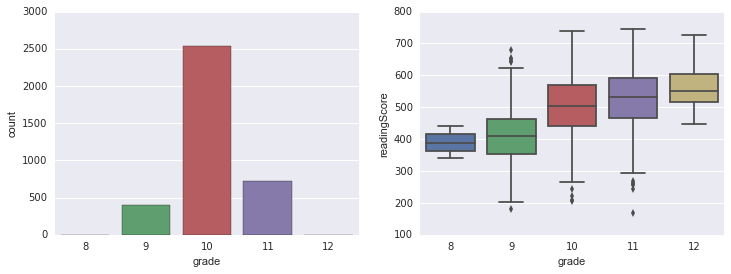

In [650]:
fig, ax = plt.subplots(1,2, figsize=(12, 4))
sns.countplot(x='grade', data=pisaTrain, ax=ax[0])
sns.boxplot(x='grade', y='readingScore', data=pisaTrain, ax=ax[1])
plt.show()

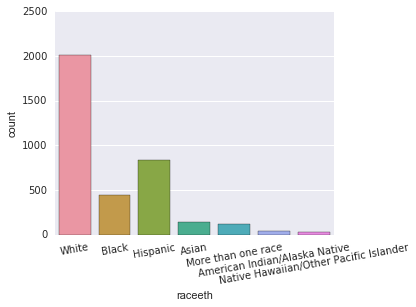

In [660]:
fig = plt.figure(figsize=(5, 4))
sns.countplot(x='raceeth', data=pisaTrain)
a = plt.xticks(rotation = 10)

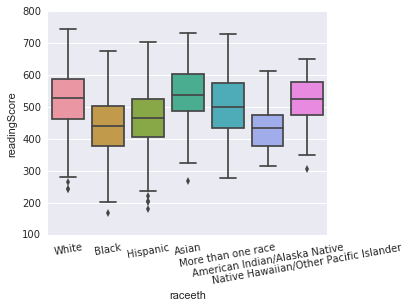

In [661]:
fig = plt.figure(figsize=(5, 4))
sns.boxplot(x='raceeth', y='readingScore', data=pisaTrain)
x = plt.xticks(rotation = 10)
plt.show()

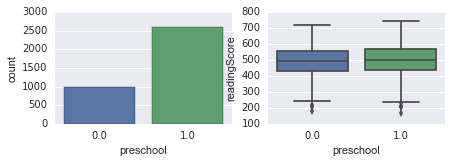

In [667]:
fig, ax = plt.subplots(1,2, figsize=(7, 2))
sns.countplot(x='preschool', data=pisaTrain, ax=ax[0])
sns.boxplot(x='preschool', y='readingScore', data=pisaTrain, ax=ax[1])
plt.show()

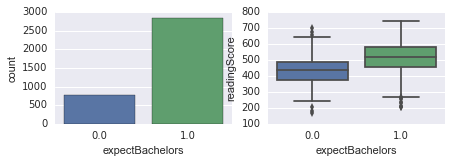

In [668]:
fig, ax = plt.subplots(1,2, figsize=(7, 2))
sns.countplot(x='expectBachelors', data=pisaTrain, ax=ax[0])
sns.boxplot(x='expectBachelors', y='readingScore', data=pisaTrain, ax=ax[1])
plt.show()

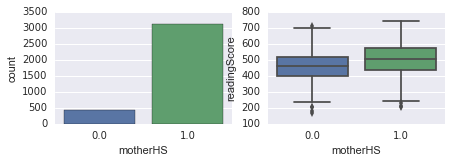

In [669]:
fig, ax = plt.subplots(1,2, figsize=(7, 2))
sns.countplot(x='motherHS', data=pisaTrain, ax=ax[0])
sns.boxplot(x='motherHS', y='readingScore', data=pisaTrain, ax=ax[1])
plt.show()

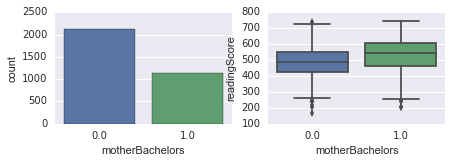

In [670]:
fig, ax = plt.subplots(1,2, figsize=(7, 2))
sns.countplot(x='motherBachelors', data=pisaTrain, ax=ax[0])
sns.boxplot(x='motherBachelors', y='readingScore', data=pisaTrain, ax=ax[1])
plt.show()

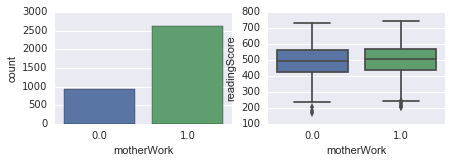

In [671]:
fig, ax = plt.subplots(1,2, figsize=(7, 2))
sns.countplot(x='motherWork', data=pisaTrain, ax=ax[0])
sns.boxplot(x='motherWork', y='readingScore', data=pisaTrain, ax=ax[1])
plt.show()

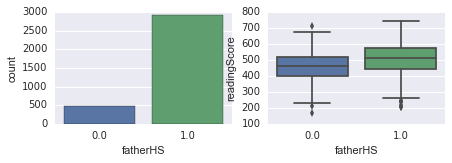

In [683]:
fig, ax = plt.subplots(1,2, figsize=(7, 2))
sns.countplot(x='fatherHS', data=pisaTrain, ax=ax[0])
sns.boxplot(x='fatherHS', y='readingScore', data=pisaTrain, ax=ax[1])
plt.show()

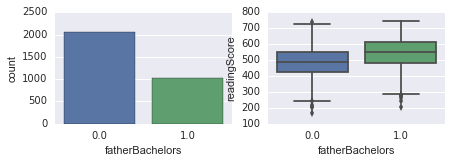

In [682]:
fig, ax = plt.subplots(1,2, figsize=(7, 2))
sns.countplot(x='fatherBachelors', data=pisaTrain, ax=ax[0])
sns.boxplot(x='fatherBachelors', y='readingScore', data=pisaTrain, ax=ax[1])
plt.show()

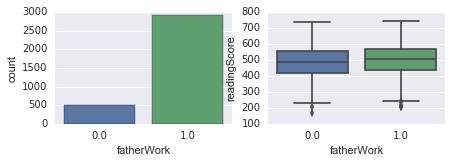

In [672]:
fig, ax = plt.subplots(1,2, figsize=(7, 2))
sns.countplot(x='fatherWork', data=pisaTrain, ax=ax[0])
sns.boxplot(x='fatherWork', y='readingScore', data=pisaTrain, ax=ax[1])
plt.show()

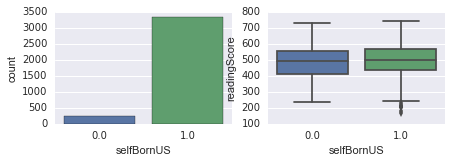

In [681]:
fig, ax = plt.subplots(1,2, figsize=(7, 2))
sns.countplot(x='selfBornUS', data=pisaTrain, ax=ax[0])
sns.boxplot(x='selfBornUS', y='readingScore', data=pisaTrain, ax=ax[1])
plt.show()

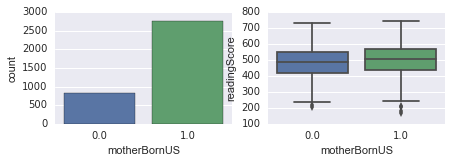

In [673]:
fig, ax = plt.subplots(1,2, figsize=(7, 2))
sns.countplot(x='motherBornUS', data=pisaTrain, ax=ax[0])
sns.boxplot(x='motherBornUS', y='readingScore', data=pisaTrain, ax=ax[1])
plt.show()

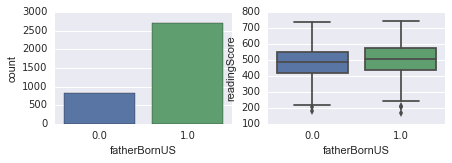

In [674]:
fig, ax = plt.subplots(1,2, figsize=(7, 2))
sns.countplot(x='fatherBornUS', data=pisaTrain, ax=ax[0])
sns.boxplot(x='fatherBornUS', y='readingScore', data=pisaTrain, ax=ax[1])
plt.show()

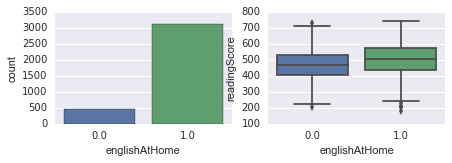

In [675]:
fig, ax = plt.subplots(1,2, figsize=(7, 2))
sns.countplot(x='englishAtHome', data=pisaTrain, ax=ax[0])
sns.boxplot(x='englishAtHome', y='readingScore', data=pisaTrain, ax=ax[1])
plt.show()

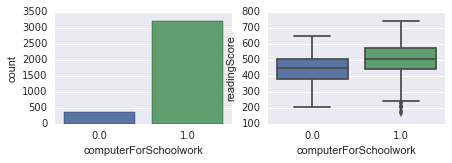

In [677]:
fig, ax = plt.subplots(1,2, figsize=(7, 2))
sns.countplot(x='computerForSchoolwork', data=pisaTrain, ax=ax[0])
sns.boxplot(x='computerForSchoolwork', y='readingScore', data=pisaTrain, ax=ax[1])
plt.show()

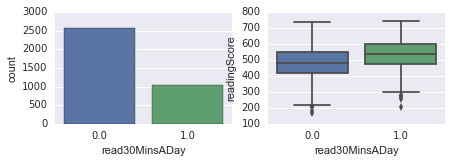

In [676]:
fig, ax = plt.subplots(1,2, figsize=(7, 2))
sns.countplot(x='read30MinsADay', data=pisaTrain, ax=ax[0])
sns.boxplot(x='read30MinsADay', y='readingScore', data=pisaTrain, ax=ax[1])
plt.show()

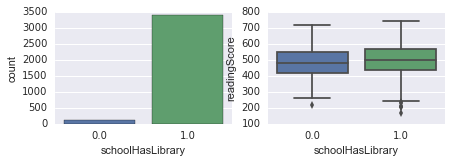

In [678]:
fig, ax = plt.subplots(1,2, figsize=(7, 2))
sns.countplot(x='schoolHasLibrary', data=pisaTrain, ax=ax[0])
sns.boxplot(x='schoolHasLibrary', y='readingScore', data=pisaTrain, ax=ax[1])
plt.show()

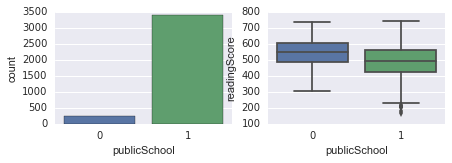

In [679]:
fig, ax = plt.subplots(1,2, figsize=(7, 2))
sns.countplot(x='publicSchool', data=pisaTrain, ax=ax[0])
sns.boxplot(x='publicSchool', y='readingScore', data=pisaTrain, ax=ax[1])
plt.show()

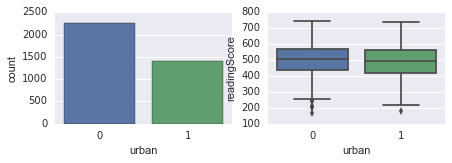

In [680]:
fig, ax = plt.subplots(1,2, figsize=(7, 2))
sns.countplot(x='urban', data=pisaTrain, ax=ax[0])
sns.boxplot(x='urban', y='readingScore', data=pisaTrain, ax=ax[1])
plt.show()

In [550]:
contFeatures

['minutesPerWeekEnglish', 'studentsInEnglish', 'schoolSize']

In [551]:
pisaTrain[contFeatures+['male']].describe()

,minutesPerWeekEnglish,studentsInEnglish,schoolSize,male
count,3477.000000,3414.000000,3501.000000,3663.000000
mean,266.208225,24.499414,1369.316767,0.511057
std,148.403525,7.184348,869.983618,0.499946
min,0.000000,1.000000,100.000000,0.000000
25%,225.000000,20.000000,712.000000,0.000000
50%,250.000000,25.000000,1212.000000,1.000000
75%,300.000000,30.000000,1900.000000,1.000000
max,2400.000000,75.000000,6694.000000,1.000000


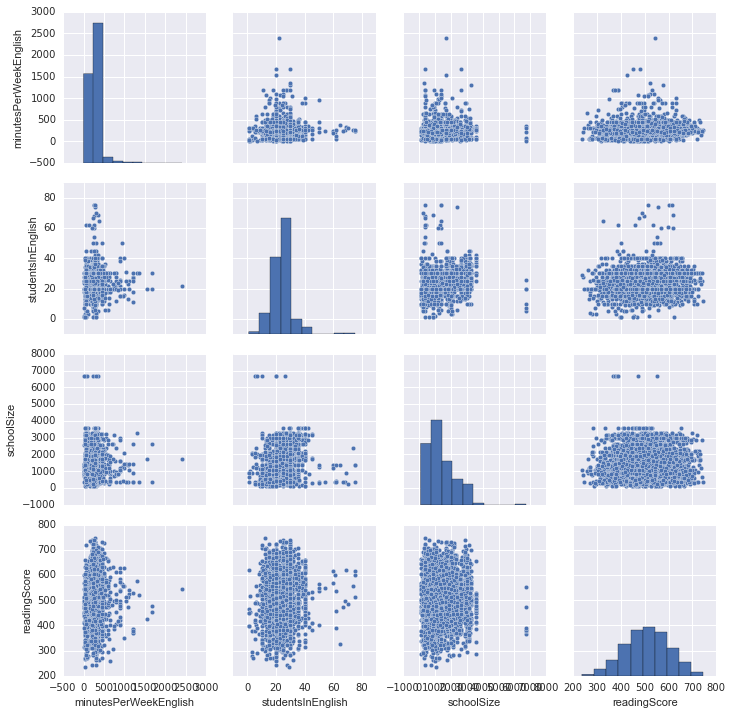

In [685]:
sns.pairplot(pisaTrain[contFeatures + ['readingScore']].dropna())

The target variable **readingScore** has a normal distribution. The variables **schoolSize** and **minutesPerWeekEnglish** shows some skewness.

In [553]:
pisaTrain[binaryFeatures].mean().sort_values(ascending=False)

schoolHasLibrary         0.967614
publicSchool             0.933934
selfBornUS               0.931274
computerForSchoolwork    0.899389
motherHS                 0.879978
englishAtHome            0.871659
fatherHS                 0.859274
fatherWork               0.853061
expectBachelors          0.785893
motherBornUS             0.772550
fatherBornUS             0.766761
motherWork               0.734454
preschool                0.722761
male                     0.511057
urban                    0.384930
motherBachelors          0.348132
fatherBachelors          0.331933
read30MinsADay           0.289887
dtype: float64

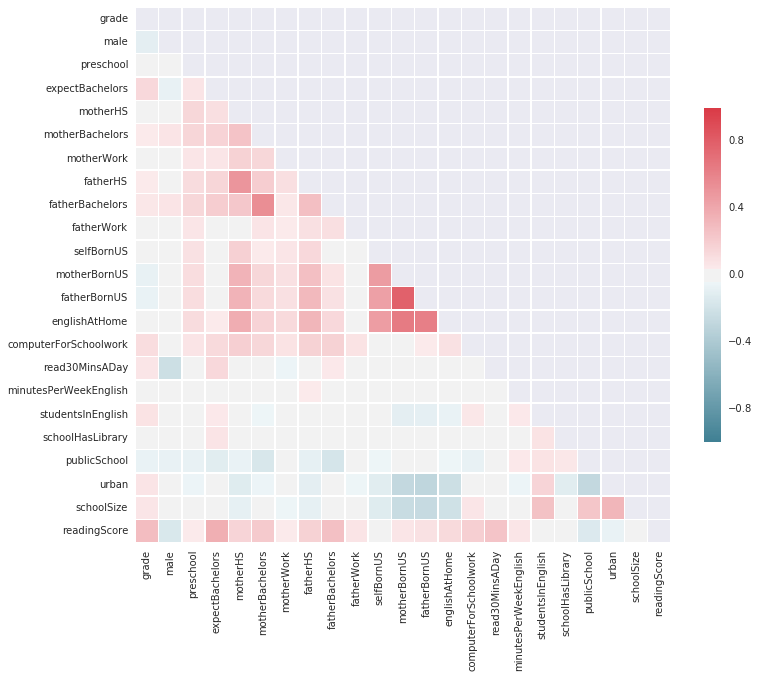

In [554]:
cont_data_corr = pisaTrain.corr()

mask = np.zeros_like(cont_data_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# # Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))
#
# # Generate a custom diverging colormap
#cmap = sns.diverging_palette(220, 10, as_cmap=True)
#
# # Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cont_data_corr, mask=mask, cmap=cmap,vmax=1,
            square=True,linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.show()

In [555]:
cor_dict = corr['readingScore'].to_dict()
del cor_dict['readingScore']
print("List the numerical features decendingly by their correlation with Reading Score:\n")
for ele in sorted(cor_dict.items(), key = lambda x: -abs(x[1])):
    print("%21s: %.3f" %(ele))

List the numerical features decendingly by their correlation with Reading Score:

      expectBachelors: 0.360
                grade: 0.287
      fatherBachelors: 0.266
       read30MinsADay: 0.247
      motherBachelors: 0.214
computerForSchoolwork: 0.190
             fatherHS: 0.175
             motherHS: 0.156
                 male: -0.154
         publicSchool: -0.134
        englishAtHome: 0.126
         fatherBornUS: 0.089
           fatherWork: 0.070
minutesPerWeekEnglish: 0.068
                urban: -0.064
         motherBornUS: 0.063
           motherWork: 0.043
            preschool: 0.041
     schoolHasLibrary: 0.038
    studentsInEnglish: 0.035
           schoolSize: 0.027
           selfBornUS: 0.024


The dark red color shows positive correlations whereas the dark blue color shows negative correlation.

Most correlations observed are:
* 'motherHS' and 'fatherHS'
* 'motherBachelors' and 'fatherBachelors'
* 'motherBornUS' and 'fatherBornUS'
* 'motherBornUS' and 'englishAtHome'
* 'fatherBornUS' and 'englishAtHome'

### Algorithms and Techniques

### Benchmark

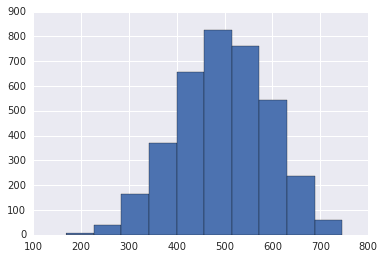

In [556]:
plt.hist(y_train)
plt.show()

In [557]:
meanScore = np.mean(pisaTrain.readingScore)
print 'mean score:', meanScore
trainMeanRMSE = np.sqrt(np.mean((meanScore - pisaTrain.readingScore)**2))
print 'benchmark RMSE using mean:', trainMeanRMSE

mean score: 497.911403221
benchmark RMSE using mean: 95.5021145158


## III. Methodology
(3-5 pages)

### Data Preprocessing

#### First model before any processing

In [558]:
# drop all NaN rows
df = pisaTrain.dropna()
# remove category variable raceeth
df = df.drop('raceeth', axis=1)
X_train = df.iloc[:,:-1].values
y_train = df['readingScore'].values
_ = do_cross_validation(X_train, y_train)

LR: 77.005626 (2.299419) r2: 0.247702 (0.050454)
LASSO: 77.420180 (2.353156) r2: 0.240048 (0.043700)
EN: 82.189403 (2.825104) r2: 0.144828 (0.024379)
KNN: 88.123485 (2.657280) r2: 0.014146 (0.074554)
CART: 106.867105 (4.009383) r2: -0.461665 (0.155124)
SVR: 88.935803 (3.327227) r2: -0.000746 (0.011188)


#### Handling missing values

In [736]:
# For continuous variables replace the missing data with average of columns
pisaTrain['minutesPerWeekEnglish'].fillna(int(pisaTrain['minutesPerWeekEnglish'].mean()), inplace=True)
pisaTrain['studentsInEnglish'].fillna(int(pisaTrain['studentsInEnglish'].mean()), inplace=True)
pisaTrain['schoolSize'].fillna(int(pisaTrain['schoolSize'].mean()), inplace=True)

# For 'raceeth' use 'missing' replacement
pisaTrain['raceeth'].fillna('White', inplace=True)
# For binary variable use 0.5 in place of missing value

pisaTrain = pisaTrain.apply(lambda x:x.fillna(0.5))

#### Create dummy variables for category fields

In [ ]:
raceeth = pd.get_dummies(pisaTrain['raceeth'], 'raceeth')
pisaTrain = pd.concat([pisaTrain, raceeth], axis=1)
pisaTrain = pisaTrain.drop('raceeth', axis=1)
y_train = pisaTrain['readingScore'].values
pisaTrain = pisaTrain.drop('readingScore', axis=1)

In [745]:
X_train = pisaTrain.values
_ = do_cross_validation(X_train, y_train)

LR: 76.447360 (2.051110) r2: 0.356024 (0.041411)
LASSO: 77.212215 (1.611805) r2: 0.343418 (0.033155)
EN: 84.352570 (1.518329) r2: 0.217079 (0.016876)
KNN: 92.458633 (2.153058) r2: 0.059295 (0.030787)
CART: 106.609617 (3.332058) r2: -0.263795 (0.088782)
SVR: 94.962718 (1.935065) r2: 0.008038 (0.005556)


In [741]:
#pisaTrain = pisaTrain.dropna()
pisaTrain.columns

Index([u'grade', u'male', u'raceeth', u'preschool', u'expectBachelors',
       u'motherHS', u'motherBachelors', u'motherWork', u'fatherHS',
       u'fatherBachelors', u'fatherWork', u'selfBornUS', u'motherBornUS',
       u'fatherBornUS', u'englishAtHome', u'computerForSchoolwork',
       u'read30MinsADay', u'minutesPerWeekEnglish', u'studentsInEnglish',
       u'schoolHasLibrary', u'publicSchool', u'urban', u'schoolSize',
       u'readingScore'],
      dtype='object')

#### Feature Selection: 1. SelectKBest

In [638]:
from sklearn.feature_selection import SelectKBest
from numpy import set_printoptions
from sklearn.feature_selection import f_regression
X = pisaTrain.values
y = y_train
# feature extraction

test = SelectKBest(score_func=f_regression, k=23)
fit = test.fit(X, y)
# summarize scores
set_printoptions(precision=3)
i = 0
KBest_ranking = {}
for score in fit.scores_:
    KBest_ranking[pisaTrain.columns[i]] = score
    i +=1

for key in sorted(KBest_ranking, key=KBest_ranking.get, reverse=True):
    print "%3d %s" % (KBest_ranking[key], key)
#features = fit.transform(X)
#_ = do_cross_validation(features, y_train)

324 expectBachelors
200 fatherBachelors
178 raceeth_White
145 grade
145 read30MinsADay
130 motherBachelors
100 raceeth_Black
 91 raceeth_Hispanic
 81 computerForSchoolwork
 70 fatherHS
 47 motherHS
 40 male
 30 publicSchool
 28 englishAtHome
 14 raceeth_American Indian/Alaska Native
 14 fatherWork
 12 raceeth_Asian
 10 fatherBornUS
  6 motherBornUS
  6 preschool
  3 minutesPerWeekEnglish
  1 motherWork
  1 schoolHasLibrary
  1 schoolSize
  0 raceeth_Native Hawaiian/Other Pacific Islander
  0 urban
  0 selfBornUS
  0 studentsInEnglish
  0 raceeth_More than one race


#### Feature Selection: 2. RFE

In [635]:
from sklearn.feature_selection import RFE
model = GradientBoostingRegressor()
rfe = RFE(model, 1)
fit = rfe.fit(X, y)
#print("Num Features: %d") % fit.n_features_
#print("Selected Features: %s") % fit.support_
#print("Feature Ranking: %s") % fit.ranking_
#print pisaTrain.columns[fit.support_]
RFE_ranking = {}
i = 0
for rank in fit.ranking_:
    RFE_ranking[pisaTrain.columns[i]] = rank
    i += 1

for key in sorted(RFE_ranking, key=RFE_ranking.get):
    print "%2d %s" % (RFE_ranking[key], key) 

 1 schoolSize
 2 minutesPerWeekEnglish
 3 studentsInEnglish
 4 expectBachelors
 5 grade
 6 raceeth_Black
 7 raceeth_Hispanic
 8 read30MinsADay
 9 motherBachelors
10 raceeth_White
11 computerForSchoolwork
12 male
13 fatherBachelors
14 publicSchool
15 motherBornUS
16 preschool
17 raceeth_Asian
18 selfBornUS
19 fatherHS
20 englishAtHome
21 motherHS
22 raceeth_American Indian/Alaska Native
23 urban
24 raceeth_Native Hawaiian/Other Pacific Islander
25 motherWork
26 schoolHasLibrary
27 fatherWork
28 fatherBornUS
29 raceeth_More than one race


In [614]:
X_train = pisaTrain[pisaTrain.columns[fit.support_]].values
_ = do_cross_validation(X_train, y_train)

LR: 84.939455 (3.573270) r2: 0.086164 (0.050320)
LASSO: 85.541101 (3.734421) r2: 0.073874 (0.039286)
EN: 87.671229 (3.421138) r2: 0.027527 (0.017732)
KNN: 89.776236 (6.813595) r2: -0.026200 (0.157068)
CART: 84.939455 (3.573270) r2: 0.086164 (0.050320)
SVR: 85.906425 (3.784334) r2: 0.066237 (0.033386)


### Feature Selection: 3. Principal Component Analysis

In [616]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
fit = pca.fit(X)
# summarize components
print("Explained Variance: %s") %fit.explained_variance_ratio_
print(fit.components_)

Explained Variance: [  9.729e-01   2.704e-02   6.109e-05   8.632e-07]
[[  4.519e-05   6.581e-06  -1.400e-05   1.444e-05  -2.494e-05  -3.976e-06
   -2.577e-05  -2.993e-05   5.249e-06  -4.970e-06  -3.421e-05  -1.219e-04
   -1.272e-04  -8.063e-05   2.472e-05  -8.584e-06   8.245e-04   2.461e-03
    1.564e-05   8.478e-05   1.800e-04   1.000e+00  -5.762e-06   1.841e-05
    4.398e-06   1.198e-04  -3.332e-06   1.012e-06  -1.345e-04]
 [  6.256e-05  -2.702e-05  -9.502e-05   4.610e-05  -1.844e-06   6.531e-05
    6.088e-05   2.849e-05  -8.550e-06   1.807e-05  -1.849e-05   3.505e-05
    2.654e-05  -3.829e-05  -4.249e-05   1.026e-04   1.000e+00   2.301e-03
    1.354e-06   1.258e-04  -1.892e-04  -8.301e-04   6.251e-06   1.502e-05
   -5.427e-05  -4.857e-05   1.371e-05  -1.623e-06   6.948e-05]
 [  3.503e-03  -2.810e-03  -1.151e-03   1.582e-03  -7.032e-04  -3.311e-03
   -1.538e-03  -9.792e-05  -2.678e-03  -1.044e-04   8.354e-04  -1.798e-03
   -1.215e-03  -1.222e-04   1.522e-03   8.014e-04  -2.302e-03   

In [618]:
Xpca = pca.transform(X)
_=do_cross_validation(Xpca, y_train)

LR: 84.939455 (3.573270) r2: 0.086164 (0.050320)
LASSO: 85.541101 (3.734421) r2: 0.073874 (0.039286)
EN: 87.671229 (3.421138) r2: 0.027527 (0.017732)
KNN: 89.776236 (6.813595) r2: -0.026200 (0.157068)
CART: 84.939455 (3.573270) r2: 0.086164 (0.050320)
SVR: 85.906425 (3.784334) r2: 0.066237 (0.033386)


### Feature Selection: 4. Feature Importance

In [639]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X, y)
#print(model.feature_importances_)
i = 0
res_dict = {}
for f in model.feature_importances_:
    res_dict[pisaTrain.columns[i]] = f
    i += 1
    
#for key, value in sorted(res_dict.iteritems(), key=lambda(k,v): (v,k)):
#    print "%f %s" % (value, key)

for key in sorted(res_dict, key=res_dict.get, reverse=True):
    print "%.4f %s" % (res_dict[key], key)


0.1189 expectBachelors
0.1123 schoolSize
0.1053 minutesPerWeekEnglish
0.1031 studentsInEnglish
0.0669 grade
0.0597 raceeth_White
0.0422 read30MinsADay
0.0342 motherBachelors
0.0327 male
0.0322 motherWork
0.0313 urban
0.0309 preschool
0.0294 fatherBachelors
0.0219 fatherWork
0.0186 motherBornUS
0.0180 motherHS
0.0175 fatherBornUS
0.0171 publicSchool
0.0159 fatherHS
0.0151 computerForSchoolwork
0.0136 selfBornUS
0.0135 raceeth_Black
0.0121 raceeth_Asian
0.0115 schoolHasLibrary
0.0111 englishAtHome
0.0089 raceeth_Hispanic
0.0036 raceeth_More than one race
0.0014 raceeth_American Indian/Alaska Native
0.0013 raceeth_Native Hawaiian/Other Pacific Islander


In [598]:
model = GradientBoostingRegressor(n_estimators=150, random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)

cv_results = np.sqrt(-cross_val_score(model, features, y_train, scoring=scoring, cv=kfold))
cv_r2 = cross_val_score(model, features, y_train, scoring='r2', cv=kfold)

print  "Gradient Boosing Regressor RMSE: %f (%f)" % (cv_results.mean(), cv_results.std())
print  "Gradient Boosing Regressor R2: %f (%f)" % (cv_r2.mean(), cv_r2.std())

Gradient Boosing Regressor RMSE: 74.498045 (2.735097)
Gradient Boosing Regressor R2: 0.295644 (0.054933)


In [514]:
# fill every column with its own most frequent value
#pisaTrain = pisaTrain.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [561]:
pisaTrain.dropna().shape

(2414, 24)

#### Model after imputing missing values

In [563]:
X_train = pisaTrain.drop(['raceeth', 'readingScore'], axis=1).values
y_train = pisaTrain['readingScore'].values

In [564]:
_ = do_cross_validation(X_train, y_train)

LR: 77.005626 (2.299419) r2: 0.247702 (0.050454)
LASSO: 77.420180 (2.353156) r2: 0.240048 (0.043700)
EN: 82.189403 (2.825104) r2: 0.144828 (0.024379)
KNN: 88.123485 (2.657280) r2: 0.014146 (0.074554)
CART: 107.295851 (4.560908) r2: -0.461299 (0.147174)
SVR: 88.935803 (3.327227) r2: -0.000746 (0.011188)


In [744]:
pisaTrain = pisaTrain.drop('readingScore', axis=1)
X_train = pisaTrain.values

_ = do_cross_validation(X_train, y_train)

LR: 76.447360 (2.051110) r2: 0.356024 (0.041411)
LASSO: 77.212215 (1.611805) r2: 0.343418 (0.033155)
EN: 84.352570 (1.518329) r2: 0.217079 (0.016876)
KNN: 92.458633 (2.153058) r2: 0.059295 (0.030787)
CART: 107.413749 (3.391888) r2: -0.281023 (0.074247)
SVR: 94.962718 (1.935065) r2: 0.008038 (0.005556)


#### Data transformations

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000039DC2048>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000039619CF8>]], dtype=object)

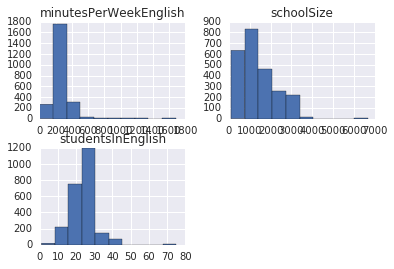

In [567]:
pisaTrain[contFeatures].hist()

In [237]:
# log transformations - No improvements
#np.log(allData['schoolSize']).hist()
#allData['schoolSize'] = np.log(allData['schoolSize'])
#np.log1p(allData['minutesPerWeekEnglish']).hist()
#allData['minutesPerWeekEnglish'] = np.log1p(allData['minutesPerWeekEnglish'])

### Implementation

In [568]:
# Standardize the dataset
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', MinMaxScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = np.sqrt(-cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error'))
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 76.944864 (7.118527)
ScaledLASSO: 74.203522 (2.777269)
ScaledEN: 75.031366 (2.712704)
ScaledKNN: 81.794770 (2.605510)
ScaledCART: 106.932101 (3.855188)
ScaledSVR: 80.833584 (2.972799)


#### Ensemble methods

In [569]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor())])))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = np.sqrt(-cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring))
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledAB: 76.845065 (2.130382)
ScaledGBM: 72.636199 (2.421526)
ScaledRF: 79.934657 (2.971468)
ScaledET: 87.737101 (3.817180)


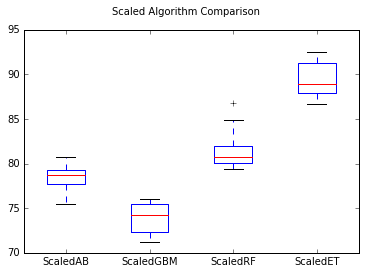

In [319]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

74.5031653788


In [570]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test, y_pred)
R2

0.9589629149446891

### Refinement

In [571]:
from sklearn.model_selection import GridSearchCV
# Tune scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)

In [572]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -5286.431538 using {'n_estimators': 100}
-5384.177425 (381.896429) with: {'n_estimators': 50}
-5286.431538 (356.165545) with: {'n_estimators': 100}
-5298.556481 (333.280794) with: {'n_estimators': 150}
-5343.473388 (330.601687) with: {'n_estimators': 200}
-5378.166911 (332.341387) with: {'n_estimators': 250}
-5429.598484 (339.901512) with: {'n_estimators': 300}
-5474.953629 (347.164762) with: {'n_estimators': 350}
-5533.853026 (355.519936) with: {'n_estimators': 400}


In [573]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(n_estimators=150, random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)

cv_results = np.sqrt(-cross_val_score(model, rescaledX, y_train, scoring=scoring, cv=kfold))
cv_r2 = cross_val_score(model, rescaledX, y_train, scoring='r2', cv=kfold)

print  "Gradient Boosing Regressor RMSE: %f (%f)" % (cv_results.mean(), cv_results.std())
print  "Gradient Boosing Regressor R2: %f (%f)" % (cv_r2.mean(), cv_r2.std())

Gradient Boosing Regressor RMSE: 72.755908 (2.303413)
Gradient Boosing Regressor R2: 0.328018 (0.052865)


## IV. Results
(2-3 pages)

### Model Evaluation and Validation

### Justification

## V. Conclusion
(1-2 pages)

### Free-Form Visualization

### Reflection

### Improvement

### References
[1] Berger, Kathleen. Invitation to The Life Span (second ed.). worth. ISBN 978-1-4641-7205-2.